# Bitcoin Linear Regression

## Introduction

- The USD for example is backed by trust in the US Government as the world’s reserve currency.
	- US Government continues to put more currency into circulation.
	- More currency into circulation devalues the currency over time.
	- USD is not currently backed by anything of physical value other than the US government
- The value of BTC is merely based on the law of supply and demand. 
	- BTC has a cap on the amount of coins that can be produced, 21 million.
	- Due to the supply being limited to 21 million, as demand increases the value will likely increase.

- The likelihood of the United States adopting BTC as its universal currency is small
- Some countries that are susceptible to significant currency manipulation, like hyperinflation, may be enticed to use bitcoin. 
- Individuals may revert to BTC so that their money holds value

## Abstract
An investment in bitcoin is the equivalent of betting on the increased adoption of this asset. Contrary to the US dollar, which used to be backed by gold and currently is backed by trust on the US government) bitcoin itself has no intrinsic value. This means that bitcoin’s market price is based on the law of supply and demand. Furthermore, bitcoin has a cap on the amount of coins produced, namely 21 million. This makes bitcoin a deflationary asset, which translates into a greater economic value as its supply decreases.

## Goal
Identify features around the Bitcoin blockchain that might have an impact on the price of bitcoin, such as, market capitalization, transaction volume, miners revenue, transactions per block, estimated volume, average block size, hash rate, number of orphan blocks...



## Proposed Method
This project iterates from linear regression evaluations to test if bitcoin’s market price can be significantly predicted by other Bitcoin’s blockchain features such as market price, hash rate, difficulty adjustment, transactions volume... 
After few simple linear regression models and correlation analysis, a multiple linear regression model with multiple explanatory variables will help us in predicting the price of bitcoin. Several independent variables are explored and analyzed. After the analysis, the most correlated variables with the price of bitcoin are selected.
First, the dataset is read and its data is pre-processed. Next, we examine the historical value of bitcoin over time. After that, we will review the correlation between variables to see which one will be included in the linear regression analysis. Afterwards, a polynomial multivariable regression is performed to see whether it improves the R square value of the non-polynomial multivariable regression. The reason to use polynomial regression is: faster performance of linear methods so that the model is trained using nonlinear functions of the data. For that reason, a wider range of data can also be fitted to the model. In doing so, we could fit a parabolic plane to our model.

## Install necessary libraries

In [1]:
!pip install requests pandas numpy matplotlib seaborn sklearn statsmodels

You should consider upgrading via the '/Users/alvaroserranorivas/.pyenv/versions/3.9.2/envs/bitcoin_linear_regression/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
import time
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.cm as cm
from statsmodels.graphics.gofplots import ProbPlot
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sns.set(style="whitegrid")

In [3]:
USD= 2208000000000 # USD in circulation as of Nov 6, 2021 according to https://ycharts.com/indicators/us_currency_in_circulation
Bitcoin=21000000   # 21 Million Bitcoin (Most Bitcoin that will be in Circulation)
Value=USD/Bitcoin  # Value of Bitcoin compared to the current dollar
print(f"USD/BTC in circulation: {Value}")
# Get current USD/BTC price from https://www.coindesk.com/price/
session = requests.Session()
USD_BTC_rate = session.get("https://api.coindesk.com/v1/bpi/currentprice.json").json()["bpi"]["USD"]["rate_float"]
print(f"Current USD/BTC rate: {USD_BTC_rate}")

USD/BTC in circulation: 105142.85714285714
Current USD/BTC rate: 64648.3643


## Data set description

This is an observational dataset where several metrics around bitcoin features have been recorded over time without any intentional attempt to influence the responses of the report. There are 24 columns in total.
Dataset obtained from: https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory


In [4]:
BTC_data = pd.read_csv("bitcoin_dataset.csv", header=0)
print(BTC_data.head())
print(BTC_data.columns)
print(BTC_data.shape)
BTC_data["Date"] = BTC_data["Date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
# Create a Days column that is the number of days for each row
BTC_data["Days"] = (BTC_data["Date"] - BTC_data["Date"].min()).dt.days
# Print subset of data where Median Confirmation Time is greater than 0
print(BTC_data[BTC_data["btc_median_confirmation_time"] > 0])
# Subset where Median Confirmation Time is greater than 0
BTC_data2 = BTC_data[BTC_data["btc_median_confirmation_time"] > 0]
# Drop NA values
BTC_data2.dropna(inplace=True)

                  Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0  2009-11-10 00:00:00               0.0           1339450.0             0.0   
1  2009-11-11 00:00:00               0.0           1342900.0             0.0   
2  2009-11-12 00:00:00               0.0           1346400.0             0.0   
3  2009-11-13 00:00:00               0.0           1349900.0             0.0   
4  2009-11-14 00:00:00               0.0           1354050.0             0.0   

   btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0               0.0              0.0            0.000215   
1               0.0              0.0            0.000323   
2               0.0              0.0            0.000215   
3               0.0              0.0            0.000242   
4               0.0              0.0            0.000216   

   btc_n_orphaned_blocks  btc_n_transactions_per_block  \
0                    0.0                           1.0   
1                    0.0                  

/Users/alvaroserranorivas/.pyenv/versions/3.9.2/envs/bitcoin_linear_regression/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


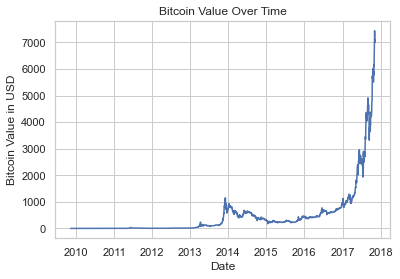

In [5]:
# Plot btc_market_price vs Date with a scatter plot
plt.plot(BTC_data["Date"], BTC_data["btc_market_price"])
plt.title("Bitcoin Value Over Time")
plt.xlabel("Date")
plt.ylabel("Bitcoin Value in USD")
plt.show()

We can see that the value of bitcoin has grown exponentially.


## Exploratory data analysis to data set
Since market fluctuations are hard to predict and we can only analyze observational data of the past, and model based on percent change will give an accurate picture of the correlation between the most significant variables affecting bitcoin’s market price. Therefore, as price increases, so will the relative variations of the highest dependent features of Bitcoin’s blockchain. This corroborates the initial hypothesis that bitcoin’s price is dictated by the law of supply and demand. The reason for that is that eventually the percent change in the count of bitcoin will become irrelevant because of its finite supply of 21 million coins.


#### Correlation between variables

                                                    btc_avg_block_size  \
btc_avg_block_size                                            1.000000   
btc_n_orphaned_blocks                                         0.921531   
btc_n_transactions_per_block                                  0.999818   
btc_median_confirmation_time                                  0.979275   
btc_hash_rate                                                -0.756919   
btc_difficulty                                               -0.737205   
btc_miners_revenue                                           -0.791462   
btc_transaction_fees                                         -0.559594   
btc_cost_per_transaction_percent                             -0.943949   
btc_cost_per_transaction                                     -0.456912   
btc_n_unique_addresses                                        0.996330   
btc_n_transactions                                            0.999945   
btc_n_transactions_total              

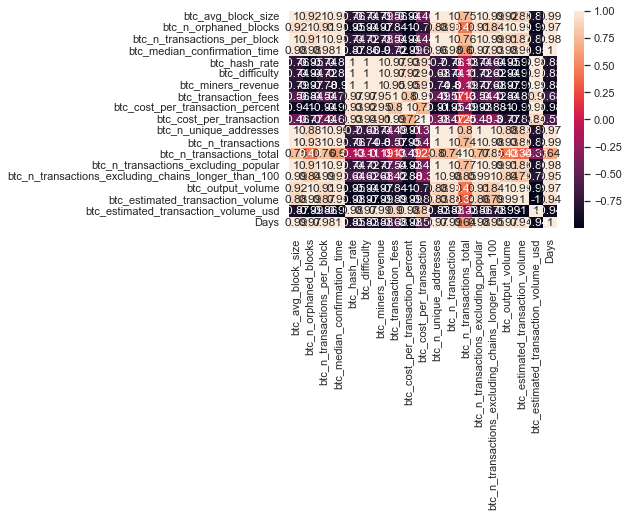

In [6]:

corr = BTC_data.corr()
corr = corr.iloc[1:4, 5:25].corr()
# Plot correlation matrix
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns)
print(corr)

The most correlated variables to Market Price are Market Cap, Hash Rate, Difficulty, Miner Revenue, and Estimated USD Transaction Volume



### Market Cap and Market Price

Coefficients: [5.99422357e-08]
Intercept: 46.039960391727504
Mean squared error: 2447.80
Variance score: 1.00


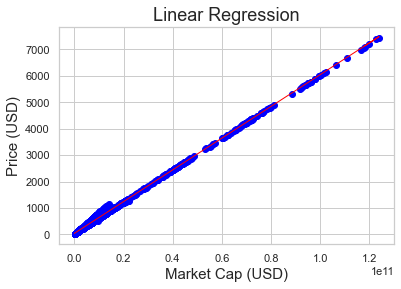

In [8]:
# Create a linear regression object
fit1 = linear_model.LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1)
# Train the model using the training sets
fit1.fit(BTC_data2[["btc_market_cap"]], BTC_data2["btc_market_price"])
# Make predictions using the testing set
predictions = fit1.predict(BTC_data2[["btc_market_cap"]])
# Residuals
residuals = BTC_data2["btc_market_price"] - predictions
# The coefficients
print(f'Coefficients: {fit1.coef_}')
# Intercept
print(f'Intercept: {fit1.intercept_}')
# The mean squared error
print("Mean squared error: %.2f"
	  % np.mean((predictions - BTC_data2["btc_market_price"]) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % fit1.score(BTC_data2[["btc_market_cap"]], BTC_data2["btc_market_price"]))
# Plot outputs
plt.scatter(BTC_data2["btc_market_cap"], BTC_data2["btc_market_price"],  color='blue')
plt.plot(BTC_data2["btc_market_cap"], predictions, color='red', linewidth=1)
plt.title('Linear Regression')
plt.xlabel('Market Cap (USD)')
plt.ylabel('Price (USD)')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.show()



Since R-Squared is very close to 1, Market Capitalization is signficant to Market Price.



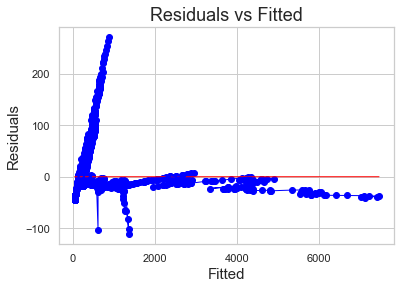

In [9]:
# Residuals vs fitted plot
plt.scatter(predictions, residuals,  color='blue')
plt.xticks(np.arange(0, max(predictions), step=2000))
plt.yticks(np.arange(-100, 300, step=100))
plt.plot(np.unique(predictions), np.poly1d(np.polyfit(predictions, residuals, 1))(np.unique(predictions)), color='red', linewidth=1)
plt.plot(predictions, residuals, color='blue', linewidth=1)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.show()



### Estimated USD Transaction Volume vs. Market Price
##### Polynomial regression

Coefficients: [ 0.00000000e+00  4.34114978e-06 -6.04679033e-16]
Intercept: 34.44178114396766
Mean squared error: 142605.89
Variance score: 0.87


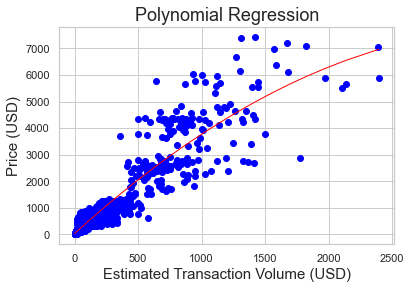

In [11]:
# Fit polynomial regression to btc_estimated_transaction_volume_usd squared vs btc_market_price
poly_btc_estimated_transaction_volume = PolynomialFeatures(degree=2).fit_transform(BTC_data2[["btc_estimated_transaction_volume_usd"]])
fit2 = linear_model.LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1)
fit2.fit(poly_btc_estimated_transaction_volume, BTC_data2["btc_market_price"])
# Make predictions using the testing set
predictions2 = fit2.predict(poly_btc_estimated_transaction_volume)
# Residuals
residuals2 = BTC_data2["btc_market_price"] - predictions2
# The coefficients
print(f'Coefficients: {fit2.coef_}')
# Intercept
print(f'Intercept: {fit2.intercept_}')
# The mean squared error
print("Mean squared error: %.2f"
	  % np.mean((predictions2 - BTC_data2["btc_market_price"]) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % fit2.score(poly_btc_estimated_transaction_volume, BTC_data2["btc_market_price"]))
# Plot outputs
plt.scatter(BTC_data2["btc_estimated_transaction_volume_usd"]/1000000, BTC_data2["btc_market_price"],  color='blue')
plt.plot(np.unique(BTC_data2["btc_estimated_transaction_volume_usd"]/1000000), np.poly1d(np.polyfit(BTC_data2["btc_estimated_transaction_volume_usd"]/1000000, BTC_data2["btc_market_price"], 2))(np.unique(BTC_data2["btc_estimated_transaction_volume_usd"]/1000000)), color='red', linewidth=1)
plt.title('Polynomial Regression')
plt.xlabel('Estimated Transaction Volume (USD)')
plt.ylabel('Price (USD)')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.show()

Transaction Volume is significant to Market Price due to R^2 = 0.86



/Users/alvaroserranorivas/.pyenv/versions/3.9.2/envs/bitcoin_linear_regression/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


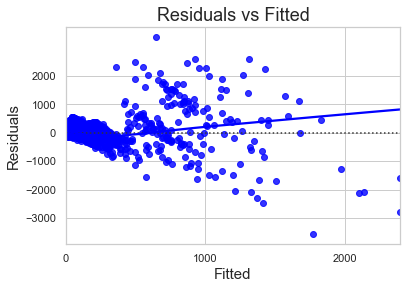

In [12]:
# Residuals vs fitted plot for transaction volume
sns.residplot(BTC_data2["btc_estimated_transaction_volume_usd"]/1000000, BTC_data2["btc_market_price"], lowess=True, color='blue')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.xticks(np.arange(0, max(BTC_data2["btc_estimated_transaction_volume_usd"]/1000000), step=1000))
plt.yticks(np.arange(-3000, 3000, step=1000))
plt.ylabel('Residuals')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.show()

- Heteroscedasticity in the residuals plot is not ideal.
	- We can see that the residuals variance increases as the prediction values increase. As the price increases the variability increases. Therefore, a transformation of a variable in the model might be required. 
	- Since most of the load appears to be in bottom, a log transformation will be attempted first.

### Second iteration of Estimated Transaction Volume (USD) and market price

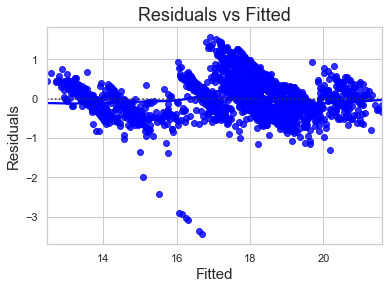

In [13]:
# Residuals vs fitted plot for linear model fit2b
sns.residplot(x=np.log(BTC_data2["btc_estimated_transaction_volume_usd"]), y=np.log(BTC_data2["btc_market_price"]), lowess=True, color='blue')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=18)
plt.show()

Coefficients: [0.90880364]
Intercept: -10.605824739229279
Mean squared error: 0.23
Variance score: 0.93


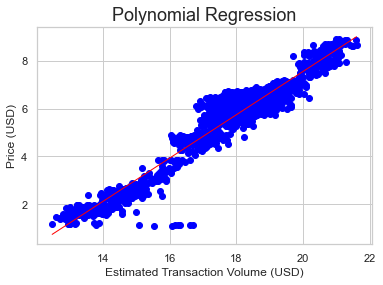

In [14]:
# Fit linear model for log transformed btc_estimated_transaction_volume_usd vs log transformed btc_market_price
fit2b = linear_model.LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1)
fit2b.fit(np.log(BTC_data2[["btc_estimated_transaction_volume_usd"]]), np.log(BTC_data2["btc_market_price"]))
# Make predictions using the testing set
predictions2b = fit2b.predict(np.log(BTC_data2[["btc_estimated_transaction_volume_usd"]]))
# Residuals
residuals2b = np.log(BTC_data2["btc_market_price"]) - np.log(predictions2b)
# The coefficients
print(f'Coefficients: {fit2b.coef_}')
# Intercept
print(f'Intercept: {fit2b.intercept_}')
# The mean squared error
print("Mean squared error: %.2f"
	  % np.mean((predictions2b - np.log(BTC_data2["btc_market_price"])) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % fit2b.score(np.log(BTC_data2[["btc_estimated_transaction_volume_usd"]]), np.log(BTC_data2["btc_market_price"])))
# Plot outputs
plt.scatter(np.log(BTC_data2["btc_estimated_transaction_volume_usd"]), np.log(BTC_data2["btc_market_price"]),  color='blue')
plt.plot(np.unique(np.log(BTC_data2["btc_estimated_transaction_volume_usd"])), np.poly1d(np.polyfit(np.log(BTC_data2["btc_estimated_transaction_volume_usd"]), np.log(BTC_data2["btc_market_price"]), 1))(np.unique(np.log(BTC_data2["btc_estimated_transaction_volume_usd"]))), color='red', linewidth=1)
plt.title('Polynomial Regression')
plt.xlabel('Estimated Transaction Volume (USD)')
plt.ylabel('Price (USD)')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.show()


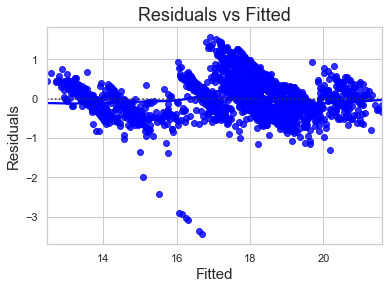

In [15]:
sns.residplot(x=np.log(BTC_data2["btc_estimated_transaction_volume_usd"]), y=np.log(BTC_data2["btc_market_price"]), lowess=True, color='blue')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=18)
plt.show()



- The log transformation improves the heteroscedasticity issue significantly in the x direction
- The dispersion on the y-axis is not ideal but less of pattern

### Miners Revenue and market price


Coefficients: [0.00000000e+00 3.65309044e-04 9.94627427e-12]
Intercept: -67.27876218906135
Mean squared error: 75171.20
Variance score: 0.93


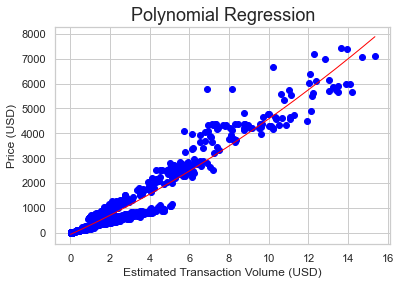

In [16]:
# Fit polynomial regression for btc_miners_revenue vs btc_market_price
poly_btc_miners_revenue = PolynomialFeatures(degree=2).fit_transform(BTC_data2[["btc_miners_revenue"]])
fit3 = linear_model.LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1)
fit3.fit(poly_btc_miners_revenue, BTC_data2["btc_market_price"])
# Make predictions using the testing set
predictions3 = fit3.predict(poly_btc_miners_revenue)
# Residuals
residuals3 = BTC_data2["btc_market_price"] - predictions3
# The coefficients
print(f'Coefficients: {fit3.coef_}')
# Intercept
print(f'Intercept: {fit3.intercept_}')
# The mean squared error
print("Mean squared error: %.2f"
	  % np.mean((predictions3 - BTC_data2["btc_market_price"]) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % fit3.score(poly_btc_miners_revenue, BTC_data2["btc_market_price"]))
# Plot outputs
plt.scatter(BTC_data2["btc_miners_revenue"]/1000000, BTC_data2["btc_market_price"],  color='blue')
plt.plot(np.unique(BTC_data2["btc_miners_revenue"]/1000000), np.poly1d(np.polyfit(BTC_data2["btc_miners_revenue"]/1000000, BTC_data2["btc_market_price"], 2))(np.unique(BTC_data2["btc_miners_revenue"]/1000000)), color='red', linewidth=1)
plt.title('Polynomial Regression')
plt.xlabel('Estimated Transaction Volume (USD)')
plt.ylabel('Price (USD)')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.show()


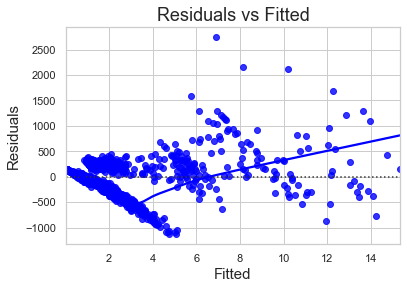

In [17]:
# Residuals vs Fitted
sns.residplot(x=BTC_data2["btc_miners_revenue"]/1000000, y=BTC_data2["btc_market_price"], lowess=True, color='blue')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=18)
plt.show()


We can see that residuals are clustered in a certain area and do not show the best dispersion in terms of heteroscedasticity

### Difficulty and Market Price

Coefficients: [0.00000000e+00 1.52149420e-09 2.27722823e-21]
Intercept: 199.6913915205463
Mean squared error: 69117.55
Variance score: 0.94


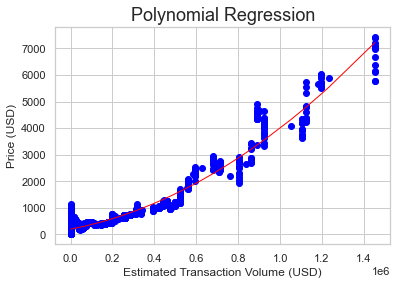

In [18]:
# Fit polynomial regression for btc_difficulty vs btc_market_price
poly_btc_difficulty = PolynomialFeatures(degree=2).fit_transform(BTC_data2[["btc_difficulty"]])
fit4 = linear_model.LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1)
fit4.fit(poly_btc_difficulty, BTC_data2["btc_market_price"])
# Make predictions using the testing set
predictions4 = fit4.predict(poly_btc_difficulty)
# Residuals
residuals4 = BTC_data2["btc_market_price"] - predictions4
# The coefficients
print(f'Coefficients: {fit4.coef_}')
# Intercept
print(f'Intercept: {fit4.intercept_}')
# The mean squared error
print("Mean squared error: %.2f"
	  % np.mean((predictions4 - BTC_data2["btc_market_price"]) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % fit4.score(poly_btc_difficulty, BTC_data2["btc_market_price"]))
# Plot outputs
plt.scatter(BTC_data2["btc_difficulty"]/1000000, BTC_data2["btc_market_price"],  color='blue')
plt.plot(np.unique(BTC_data2["btc_difficulty"]/1000000), np.poly1d(np.polyfit(BTC_data2["btc_difficulty"]/1000000, BTC_data2["btc_market_price"], 2))(np.unique(BTC_data2["btc_difficulty"]/1000000)), color='red', linewidth=1)
plt.title('Polynomial Regression')
plt.xlabel('Estimated Transaction Volume (USD)')
plt.ylabel('Price (USD)')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.show()

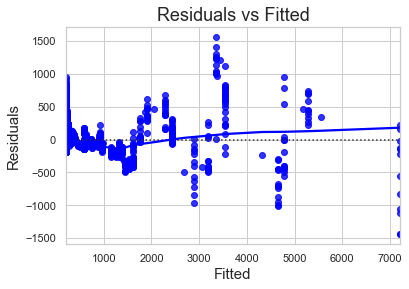

In [19]:
# Plot predictions4 vs residuals4 with sns
sns.residplot(x=predictions4, y=residuals4, lowess=True, color='blue')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=18)
plt.show()


We can see some patterns, and therefore, reject a random dispersion

### Hash Rate and Market Price

Coefficients: [0.00000000e+00 2.63592983e-04 2.93199784e-11]
Intercept: 184.0088987538802
Mean squared error: 110833.67
Variance score: 0.90


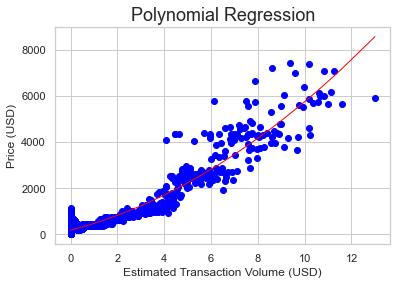

In [20]:
# Fit polynomial regression for btc_hash_rate vs btc_market_price
poly_btc_hash_rate = PolynomialFeatures(degree=2).fit_transform(BTC_data2[["btc_hash_rate"]])
fit5 = linear_model.LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1)
fit5.fit(poly_btc_hash_rate, BTC_data2["btc_market_price"])
# Make predictions using the testing set
predictions5 = fit5.predict(poly_btc_hash_rate)
# Residuals
residuals5 = BTC_data2["btc_market_price"] - predictions5
# The coefficients
print(f'Coefficients: {fit5.coef_}')
# Intercept
print(f'Intercept: {fit5.intercept_}')
# The mean squared error
print("Mean squared error: %.2f"
	  % np.mean((predictions5 - BTC_data2["btc_market_price"]) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % fit5.score(poly_btc_hash_rate, BTC_data2["btc_market_price"]))
# Plot outputs
plt.scatter(BTC_data2["btc_hash_rate"]/1000000, BTC_data2["btc_market_price"],  color='blue')
plt.plot(np.unique(BTC_data2["btc_hash_rate"]/1000000), np.poly1d(np.polyfit(BTC_data2["btc_hash_rate"]/1000000, BTC_data2["btc_market_price"], 2))(np.unique(BTC_data2["btc_hash_rate"]/1000000)), color='red', linewidth=1)
plt.title('Polynomial Regression')
plt.xlabel('Estimated Transaction Volume (USD)')
plt.ylabel('Price (USD)')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.show()

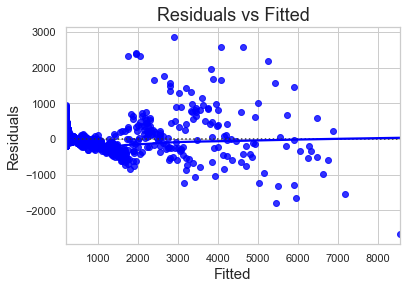

In [21]:
# Residuals vs Fitted
sns.residplot(x=predictions5, y=residuals5, lowess=True, color='blue')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=18)
plt.show()

Despite some heteroscedasticity the residuals mostly follow a flat line

### Significance Analysis of All Variables to Market Price

In [22]:
print(BTC_data2.columns.values)

['Date' 'btc_market_price' 'btc_total_bitcoins' 'btc_market_cap'
 'btc_trade_volume' 'btc_blocks_size' 'btc_avg_block_size'
 'btc_n_orphaned_blocks' 'btc_n_transactions_per_block'
 'btc_median_confirmation_time' 'btc_hash_rate' 'btc_difficulty'
 'btc_miners_revenue' 'btc_transaction_fees'
 'btc_cost_per_transaction_percent' 'btc_cost_per_transaction'
 'btc_n_unique_addresses' 'btc_n_transactions' 'btc_n_transactions_total'
 'btc_n_transactions_excluding_popular'
 'btc_n_transactions_excluding_chains_longer_than_100' 'btc_output_volume'
 'btc_estimated_transaction_volume' 'btc_estimated_transaction_volume_usd'
 'Days']


In [23]:
# Run linear regression on all variables vs btc_market_price
fit6 = linear_model.LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1)
fit6.fit(BTC_data2[["btc_difficulty", "btc_hash_rate", "btc_market_cap", "btc_estimated_transaction_volume_usd", "btc_output_volume","btc_n_transactions_total" ,"btc_trade_volume"]], BTC_data2["btc_market_price"])
# Make predictions using the testing set
predictions6 = fit6.predict(BTC_data2[["btc_difficulty", "btc_hash_rate", "btc_market_cap", "btc_estimated_transaction_volume_usd", "btc_output_volume","btc_n_transactions_total" ,"btc_trade_volume"]])
# Residuals
residuals6 = BTC_data2["btc_market_price"] - predictions6
# The coefficients
print(f'Coefficients: {fit6.coef_}')
# Intercept
print(f'Intercept: {fit6.intercept_}')
# The mean squared error
print("Mean squared error: %.2f"
	  % np.mean((predictions6 - BTC_data2["btc_market_price"]) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % fit6.score(BTC_data2[["btc_difficulty", "btc_hash_rate", "btc_market_cap", "btc_estimated_transaction_volume_usd", "btc_output_volume","btc_n_transactions_total" ,"btc_trade_volume"]], BTC_data2["btc_market_price"]))

Coefficients: [-6.09934168e-10 -7.11124066e-06  6.73424241e-08  1.78257397e-09
 -1.47371627e-06  7.09254435e-07 -4.21248993e-08]
Intercept: 19.050210647484846
Mean squared error: 1319.51
Variance score: 1.00


R^2 score is very close to 1

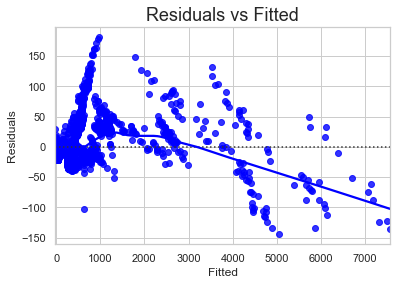

In [24]:
# Residuals vs Fitted
sns.residplot(x=predictions6, y=residuals6, lowess=True, color='blue')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=18)
plt.show()

Even though most of the volume is closer to small values on the x-axis, most of the trend line is relatively flat.

### Highly Correlated Variable vs Market Price

In [25]:
# Linear model of Highly correlated variables vs Market Price
fit7 = linear_model.LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1)
fit7.fit(BTC_data2[["btc_difficulty", "btc_hash_rate", "btc_market_cap", "btc_estimated_transaction_volume_usd", "btc_miners_revenue"]], BTC_data2["btc_market_price"])
# Make predictions using the testing set
predictions7 = fit7.predict(BTC_data2[["btc_difficulty", "btc_hash_rate", "btc_market_cap", "btc_estimated_transaction_volume_usd", "btc_miners_revenue"]])
# Residuals
residuals7 = BTC_data2["btc_market_price"] - predictions7
# The coefficients
print(f'Coefficients: {fit7.coef_}')
# Intercept
print(f'Intercept: {fit7.intercept_}')
# The mean squared error
print("Mean squared error: %.2f"
	  % np.mean((predictions7 - BTC_data2["btc_market_price"]) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % fit7.score(BTC_data2[["btc_difficulty", "btc_hash_rate", "btc_market_cap", "btc_estimated_transaction_volume_usd", "btc_miners_revenue"]], BTC_data2["btc_market_price"]))


Coefficients: [ 4.62077875e-10 -6.36732046e-05  5.21760429e-08 -3.07034342e-08
  7.14661614e-05]
Intercept: 7.08707499472996
Mean squared error: 470.90
Variance score: 1.00


It appears that all of the highly correlated vairables to Market Price (Market Cap, Hash Rate, BTC Difficulty, Miners Revenue, and Estimated Transaction Volume USD) are significant.

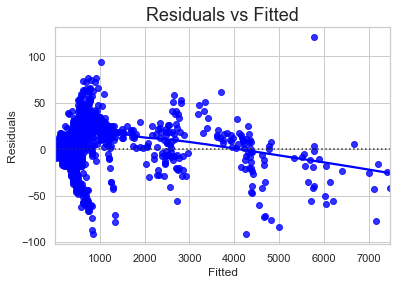

In [26]:
# Residuals vs Fitted
sns.residplot(x=predictions7, y=residuals7, lowess=True, color='blue')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=18)
plt.show()

We do not see neither a dispersion nor a trend line, so a better adjustment is needed

###### Narrow down variables
- Market Capitalization and Estimated Transaction Volume are highly correlated, only one will be included in the model. 
- Difficulty and Hash Rate are highly correlated,  only one will be included in the model.

In [27]:
highly_correlated_variables = ["btc_difficulty",  "btc_miners_revenue", "btc_estimated_transaction_volume_usd"]
highly_correlated_variables_with_market_price =  ["btc_market_price", "btc_difficulty",  "btc_miners_revenue", "btc_estimated_transaction_volume_usd"]
# Multiple Linear Regression
# Create a new dataframe with the highly correlated variables
BTC_data3 = BTC_data2[highly_correlated_variables_with_market_price]
# Run a multiple linear regression model using sm.OLS
BTC_data3 = sm.add_constant(BTC_data3)
fit8 = sm.OLS(BTC_data3["btc_market_price"], BTC_data3[highly_correlated_variables]).fit()
# Print the summary
print(fit8.summary())
print(fit8)

                                 OLS Regression Results                                
Dep. Variable:       btc_market_price   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          3.537e+04
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                        0.00
Time:                        09:21:23   Log-Likelihood:                         -14135.
No. Observations:                2153   AIC:                                  2.828e+04
Df Residuals:                    2150   BIC:                                  2.829e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------

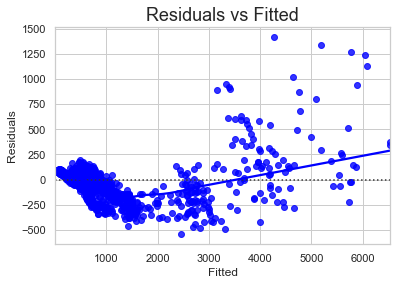

In [28]:
# Residuals vs fit plot
sns.residplot(x=fit8.fittedvalues, y=fit8.resid, lowess=True, color='blue')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=18)
plt.show()

###### Narrow down variables some more
- Difficulty, Hash Rate and Miners revenue are highly correlated,  only one will be included in the model.

In [29]:
highly_correlated_variables_excluding_volume = ["btc_miners_revenue", "btc_estimated_transaction_volume_usd"]
highly_correlated_variables_excluding_volume_with_market_price =  ["btc_market_price", "btc_miners_revenue", "btc_estimated_transaction_volume_usd"]
# Multiple Linear Regression
# Create a new dataframe with the highly correlated variables
BTC_data4 = BTC_data2[highly_correlated_variables_excluding_volume_with_market_price]
# Run a multiple linear regression model using sm.OLS
BTC_data4 = sm.add_constant(BTC_data4)
fit9 = sm.OLS(BTC_data4["btc_market_price"], BTC_data4[highly_correlated_variables_excluding_volume]).fit()
# Print the summary
print(fit9.summary())
print(fit9)


                                 OLS Regression Results                                
Dep. Variable:       btc_market_price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                          2.402e+04
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                        0.00
Time:                        09:21:23   Log-Likelihood:                         -14963.
No. Observations:                2153   AIC:                                  2.993e+04
Df Residuals:                    2151   BIC:                                  2.994e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------

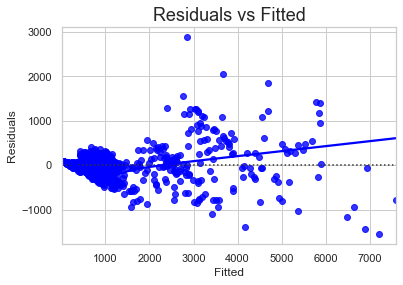

In [30]:
# Residuals vs fit plot
sns.residplot(x=fit9.fittedvalues, y=fit9.resid, lowess=True, color='blue')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=18)
plt.show()

Despite some heteroscedasticity this is the best model so far

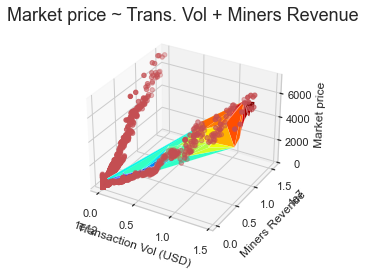

In [31]:
# Draw a  3D plot of the regression line
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the surface.
ax.scatter(BTC_data2["btc_difficulty"], BTC_data2["btc_hash_rate"], BTC_data2["btc_market_price"], c='r', marker='o')
ax.plot_trisurf(BTC_data2["btc_difficulty"], BTC_data2["btc_hash_rate"], fit8.fittedvalues, cmap='jet', linewidth=0.1)
ax.scatter(BTC_data2["btc_estimated_transaction_volume_usd"], BTC_data2["btc_miners_revenue"], BTC_data2["btc_market_price"], c='r', marker='o')
plt.title('Market price ~ Trans. Vol + Miners Revenue')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=18)
ax.set_xlabel('Transaction Vol (USD)')
ax.set_ylabel('Miners Revenue')
ax.set_zlabel('Market price')
ax.set_zlim(0, BTC_data2["btc_market_price"].max())
plt.show()

#### Polynomial Multilinear Regression
##### Linear Model: Market Price ~ Miners Revenue Squared + Count of Transactions Squared

In [32]:
# Create a dataframe with the highly correlated variables
BTC_data5 = BTC_data2[[ "btc_market_price", "btc_estimated_transaction_volume_usd", "btc_miners_revenue", "Date"]]
# Convert BTC_data5["btc_miners_revenue"] to a degree-2 polynomial 
BTC_data5 = BTC_data5.loc[:]
BTC_data5["btc_miners_revenue_squared"] = BTC_data5.loc[:, "btc_miners_revenue"].apply(lambda x: np.power(x, 2))
# Convert BTC_data5["btc_estimated_transaction_volume_usd"] to a degree-2 polynomial
BTC_data5["btc_estimated_transaction_volume_usd_squared"] = BTC_data5.loc[:, "btc_estimated_transaction_volume_usd"].apply(lambda x: np.power(x, 2))
# Run a multiple linear regression model using sm.OLS
BTC_data5 = sm.add_constant(BTC_data5)
fit10 = sm.OLS(BTC_data5["btc_market_price"], BTC_data5[["btc_estimated_transaction_volume_usd", "btc_miners_revenue"]]).fit()
# Print the summary
print(fit10.summary())
print(fit10)


                                 OLS Regression Results                                
Dep. Variable:       btc_market_price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                          2.402e+04
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                        0.00
Time:                        09:21:24   Log-Likelihood:                         -14963.
No. Observations:                2153   AIC:                                  2.993e+04
Df Residuals:                    2151   BIC:                                  2.994e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------

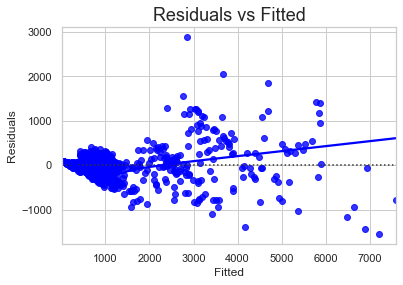

In [33]:
# Residuals vs fit plot
sns.residplot(x=fit10.fittedvalues, y=fit10.resid, lowess=True, color='blue')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=18)
plt.show()

## Model Improvements
Since prediction is the primary goal for this model and the number of categorical variables is low, it is worth considering an extension of linear regression, namely, time series.In doing so we could benefit from autocorrelation and moving averages to summarize historical information of the response variable. Time series would work better because the historical response captures signal that can be difficult to add to a regression. For instance, we might take into account bitcoin’s seasonality in terms of bitcoin’s halving occurring every 4 years.